In [1]:
from covertrace.data_array import Sites
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import abspath, dirname, join
%matplotlib inline

In [2]:
from covertrace import ops_filter
from covertrace import ops_plotter
from covertrace import ops_bool

In [3]:
data_folder = join(dirname(abspath(os.curdir)), 'covertrackdev', 'output')

### Clean the first dataset: Anisomycin stimulation followed by JNK inhibitor

In [4]:
parent_folder = join(data_folder, 'AnisoInh')
sub_folders = ['Pos001', 'Pos002']
conditions = ['AnisoInh', 'AnisoInh']
sites = Sites(parent_folder, sub_folders, conditions, file_name='df.npz')

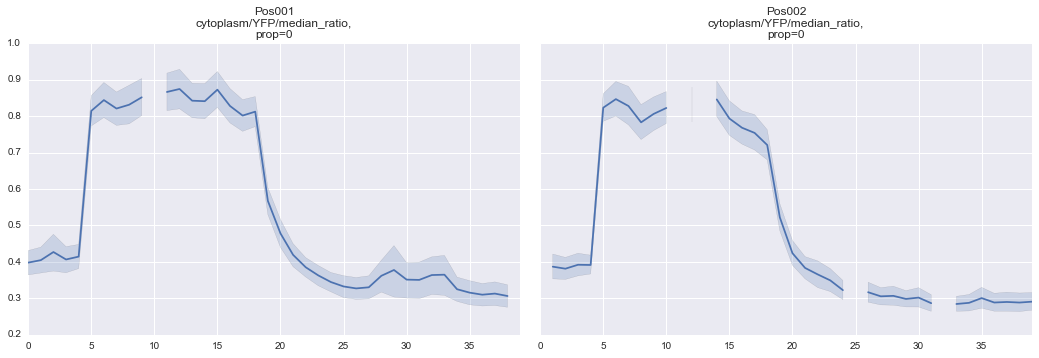

In [5]:
# First take a look at average traces for the cytoplasmic/nuclear ratio of median intensity. nan is there.
sites.staged.state = ['cytoplasm', 'YFP', 'median_ratio']
plot_tsplot = partial(ops_plotter.plot_tsplot)
fig, axes = sites.iterate(plot_tsplot)

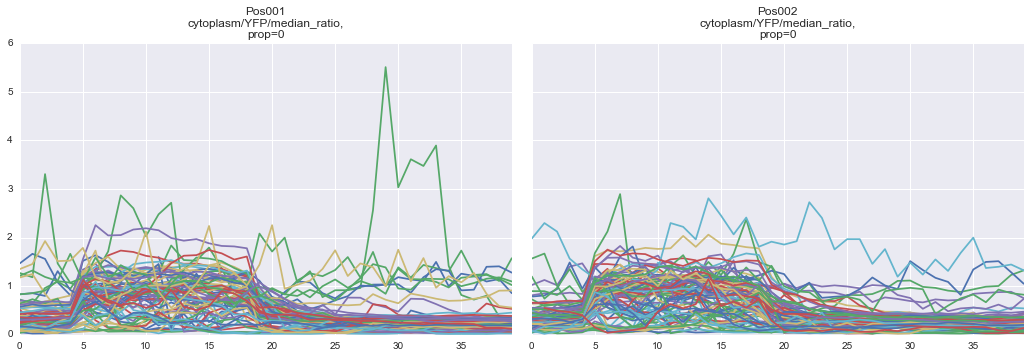

In [6]:
# Take a look at a single cell level
sites.staged.state = ['cytoplasm', 'YFP', 'median_ratio']
plot_all = partial(ops_plotter.plot_all)
fig, axes = sites.iterate(plot_all)

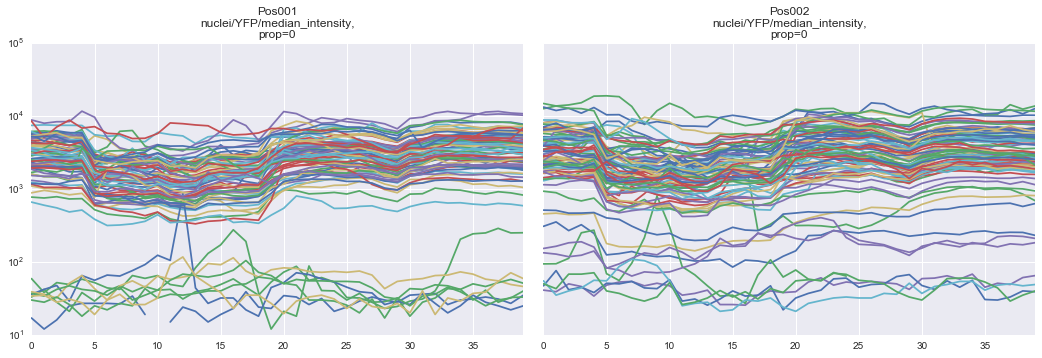

In [7]:
# You see some outliers above. The typical range of KTR is 0.5-2.
# One typical cause of these outliers is there are cells with almost no reporters expressed. 
# Check YFP intensity in nuclei. 
sites.staged.state = ['nuclei', 'YFP', 'median_intensity']
plot_all_log = partial(ops_plotter.plot_all, logy=True)
fig, axes = sites.iterate(plot_all_log)

Pos002: file_name is updated to arr_modified.npz


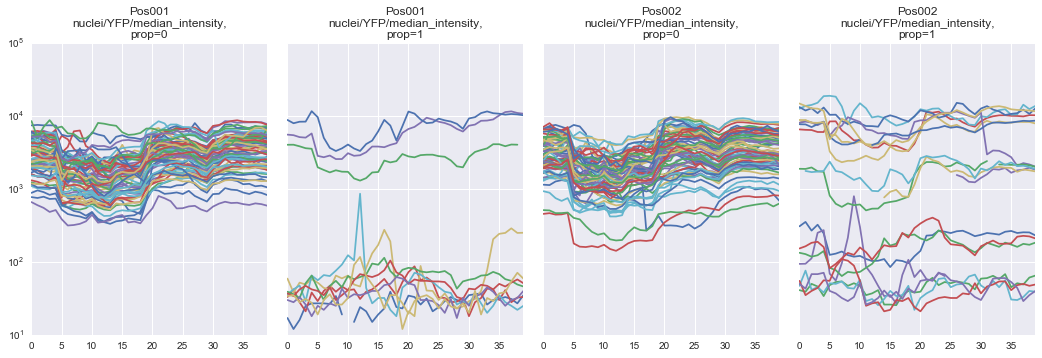

In [8]:
# Indeed you can see two population. Give "Property ID = 1" to cells with the intensity lower than 100.
op = partial(ops_bool.filter_frames_by_range, LOWER=100)
sites.iterate(op, 1)
sites.propagate_prop(pid=1)
fig, axes = sites.iterate(plot_all_log)

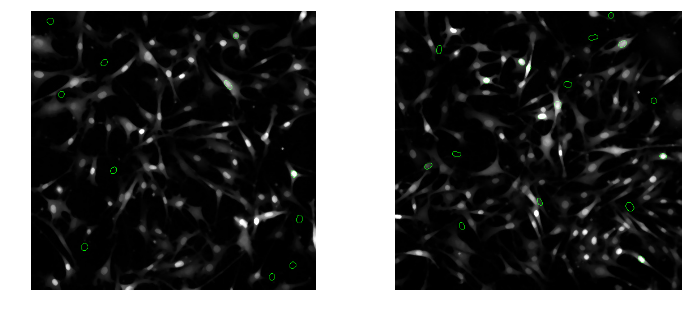

In [9]:
# You can visually check cells with prop=1 have low expression of YFP.
plt.figure(figsize=((12, 5)))
for num, site in enumerate(sites):
    ch_img = site.images.YFP(frame=1, rgb=True)
    cell_prop_1 = set(site.data['cytoplasm', 'YFP','label_id'][site.data.prop==1])
    for low_cell in cell_prop_1:
        bool_ = site.images.nuclei(frame=1)==low_cell
        ch_img[bool_,1] = 255
    plt.subplot(1, 2, num+1)
    plt.imshow(ch_img, cmap='Greys_r')
    plt.axis('off')

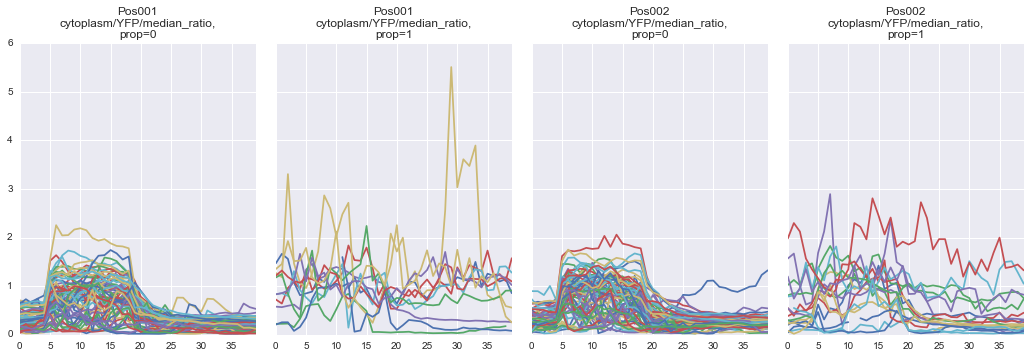

In [10]:
sites.staged.state = ['cytoplasm', 'YFP', 'median_ratio']
fig, axes = sites.iterate(plot_all)

In [11]:
# You can see the cells with low expression of reporters (prop=1) have noisy traces. Remove these cells.
# Save this as df_cleaned.npz
sites.staged.new_file_name = 'df_cleaned.npz'
sites.drop_prop(1)

Pos002: file_name is updated to df_cleaned.npz


### Clean second dataset: LMB treatment of JNK KTR AA/EE mutants

In [12]:
parent_folder_mut = join(data_folder, 'LMB')
sub_folders_mut = ['Pos003', 'Pos004', 'Pos005', 'Pos006']
conditions_mut = ['JNK_AA', 'JNK_AA', 'JNK_EE', 'JNK_EE']
sites_mut = Sites(parent_folder_mut, sub_folders_mut, conditions_mut, file_name='df.npz')

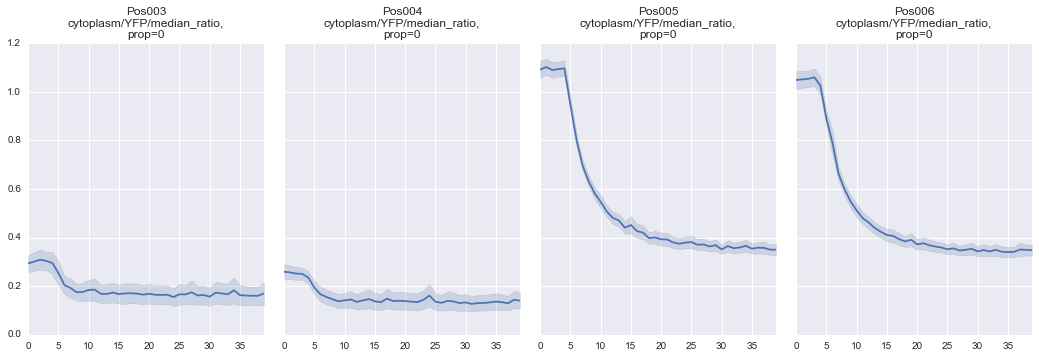

In [13]:
sites_mut.staged.state = ['cytoplasm', 'YFP', 'median_ratio']
fig, axes = sites_mut.iterate(plot_tsplot)

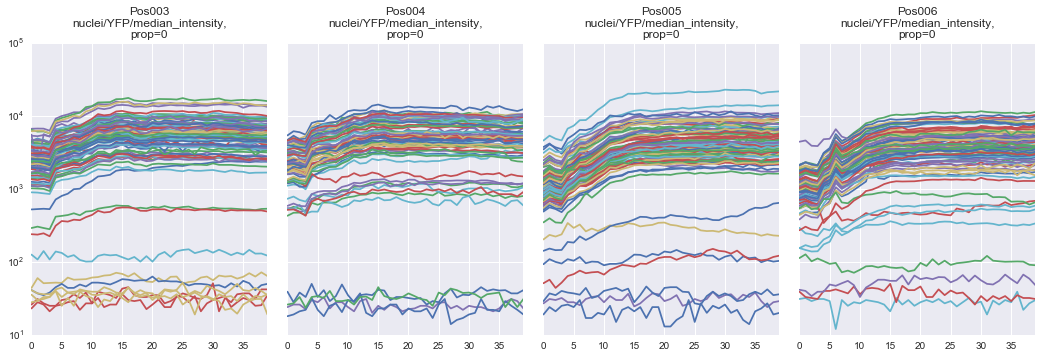

In [14]:
sites_mut.staged.state = ['nuclei', 'YFP', 'median_intensity']
fig, axes = sites_mut.iterate(plot_all_log)

In [15]:
op = partial(ops_bool.filter_frames_by_range, LOWER=1000)
sites_mut.iterate(op, 1)
sites_mut.propagate_prop(pid=1)
sites_mut.drop_prop(1)

Pos006: file_name is updated to df_cleaned.npz


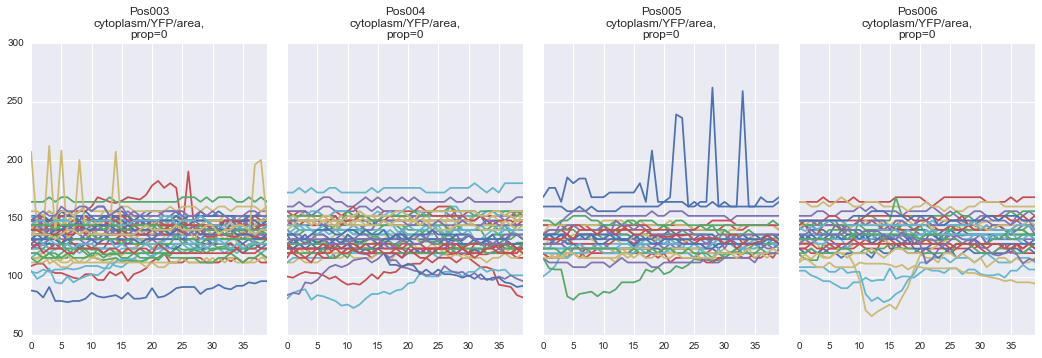

In [16]:
sites_mut.staged.state = ['cytoplasm', 'YFP', 'area']
fig, axes = sites_mut.iterate(plot_all)


In [17]:
sites_mut.staged.new_file_name = 'df_cleaned.npz'
op = partial(ops_bool.filter_frames_by_range, LOWER=90, UPPER=140)
sites_mut.iterate(op, 1)
sites_mut.propagate_prop(pid=1)
sites_mut.drop_prop(1)

Pos006: file_name is updated to df_cleaned.npz


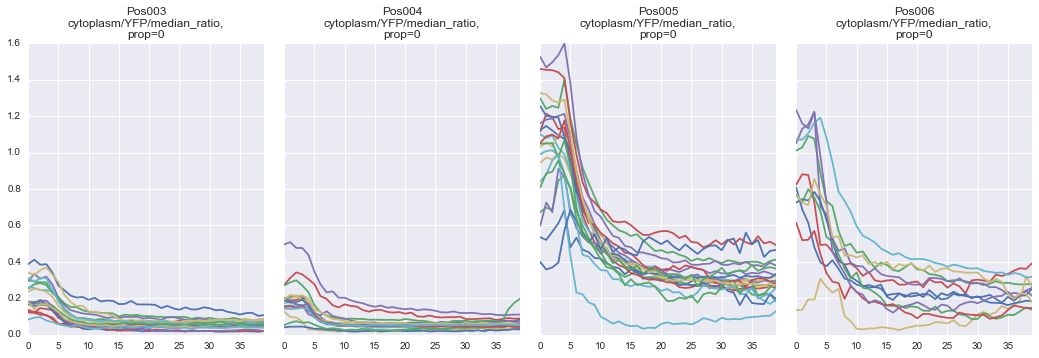

In [18]:
sites_mut.staged.state = ['cytoplasm', 'YFP', 'median_ratio']
fig, axes = sites_mut.iterate(plot_all)

### Clean the third dataset. IL1B stimulation

In [32]:
parent_folder = join(data_folder, 'IL1B')
sub_folders = ['Pos005', 'Pos006', 'Pos007', 'Pos008']
conditions = ['IL1B', 'IL1B', 'IL1B', 'IL1B']
sites_il1b = Sites(parent_folder, sub_folders, conditions, file_name='df.npz')

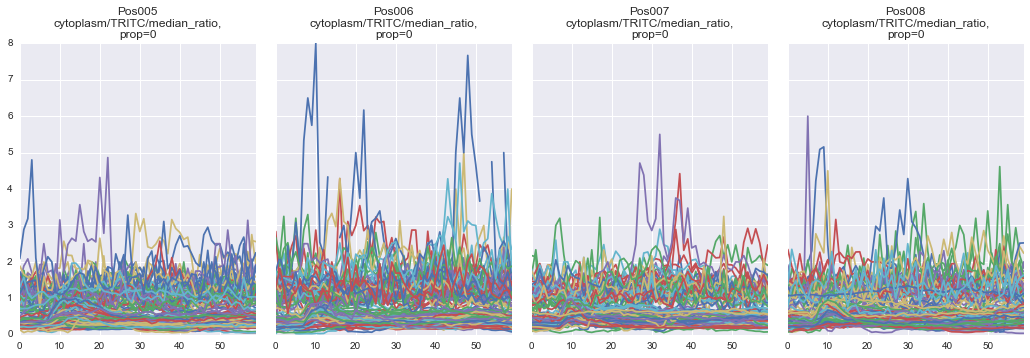

In [33]:
sites_il1b.staged.state = ['cytoplasm', 'TRITC', 'median_ratio']
fig, axes = sites_il1b.iterate(plot_all)

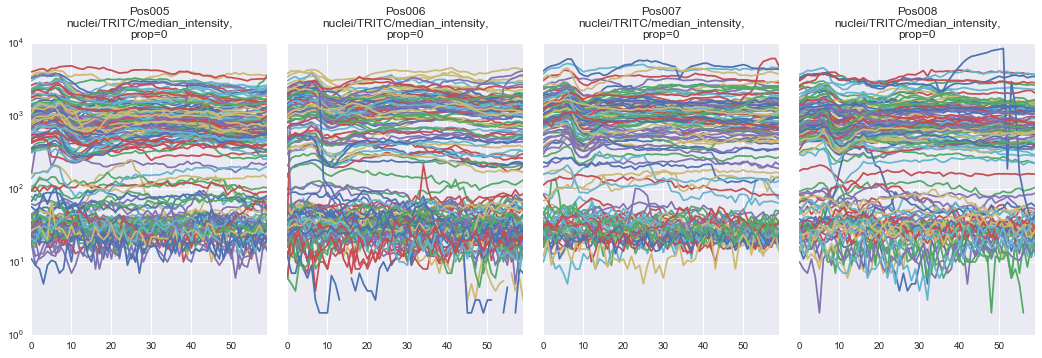

In [34]:
sites_il1b.staged.state = ['nuclei', 'TRITC', 'median_intensity']
fig, axes = sites_il1b.iterate(plot_all_log)

In [35]:
# Indeed you can see two population. Give "Property ID = 1" to cells with the intensity lower than 100.
op = partial(ops_bool.filter_frames_by_range, LOWER=200)
sites_il1b.iterate(op, 1)
sites_il1b.propagate_prop(pid=1)
sites_il1b.drop_prop(1)

Pos008: file_name is updated to df_cleaned.npz


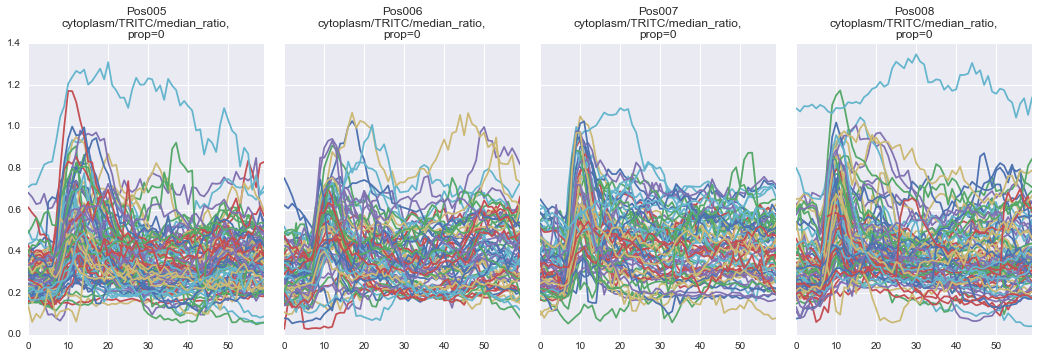

In [36]:
sites_il1b.staged.state = ['cytoplasm', 'TRITC', 'median_ratio']
fig, axes = sites_il1b.iterate(plot_all)

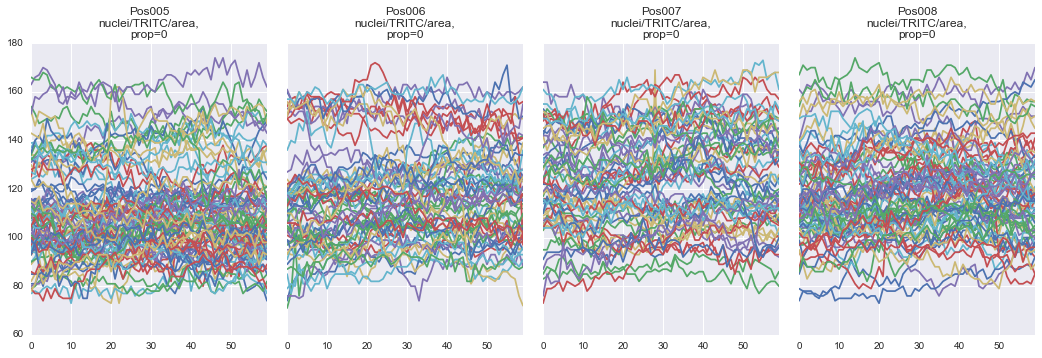

In [59]:
sites_il1b.staged.state = ['nuclei', 'TRITC', 'area']
fig, axes = sites_il1b.iterate(plot_all)

In [60]:
op = partial(ops_bool.filter_frames_by_range, LOWER=70, UPPER=175)
sites_il1b.iterate(op, 1)
sites_il1b.propagate_prop(pid=1)
sites_il1b.drop_prop(1)

Pos008: file_name is updated to df_cleaned.npz


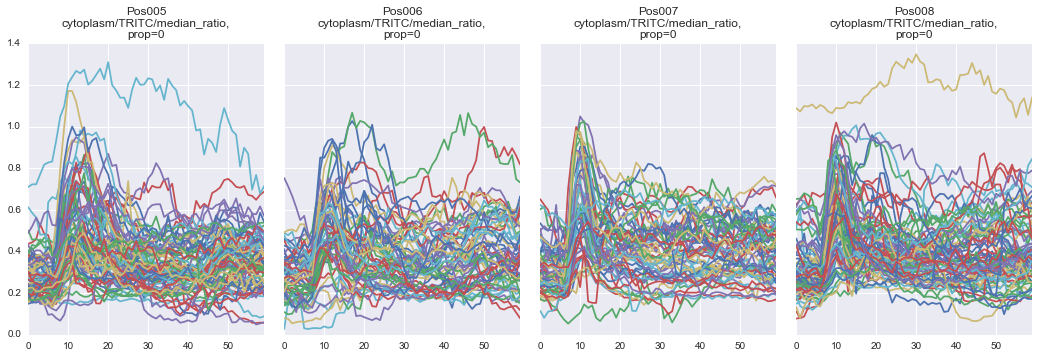

In [61]:
sites_il1b.staged.state = ['cytoplasm', 'TRITC', 'median_ratio']
fig, axes = sites_il1b.iterate(plot_all)